<a href="https://colab.research.google.com/github/HermitCrab07/Impact_of_HbA1c_on_Readmission_Rates/blob/main/_2_EDA_of_Diabetes_Dataset_for_Causal_Inference_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

EXPLORATORY DATA ANALYSIS - READ IN THE DATASET CREATED IN THE PREVIOUS NOTEBOOK



---



In [1]:
# Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore
# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records
# BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.
# Dataset was downloaded from UCI Machine Learning Repository.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Analysis_Diabetes_Dataset_CausalInference/reanalysis_diabetes_dataset.csv')
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Treatment,Insured,Readmission
count,7.151800e+04,7.151800e+04,71518.000000,71518.000000,71518.000000,71518.00000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,1.568156e+08,5.505160e+07,2.100254,3.593235,5.657457,4.28913,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700,0.215163,0.565941,0.398962
std,1.003769e+08,3.947573e+07,1.508301,5.269771,4.162580,2.94921,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674,0.410938,0.495636,0.489688
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.145807e+07,2.337577e+07,1.000000,1.000000,1.000000,2.00000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,1.440574e+08,4.816680e+07,1.000000,1.000000,7.000000,3.00000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,2.155513e+08,8.752222e+07,3.000000,3.000000,7.000000,6.00000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.00000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,1.000000,1.000000,1.000000


Histograms of Covariates: Baseline & During Encounter - by Treatment & Control.


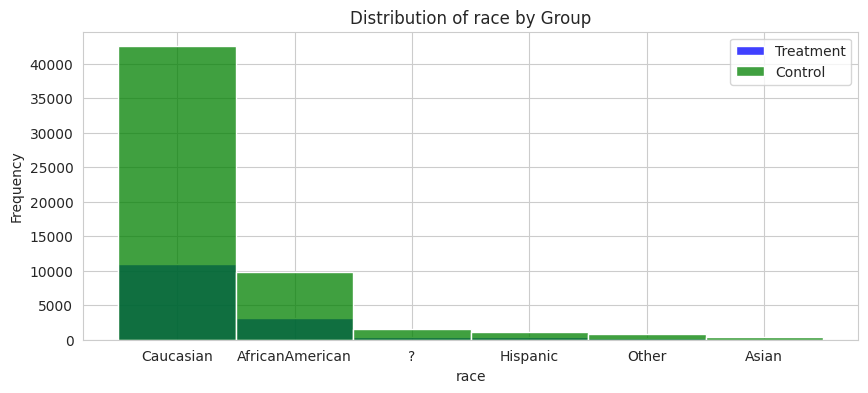

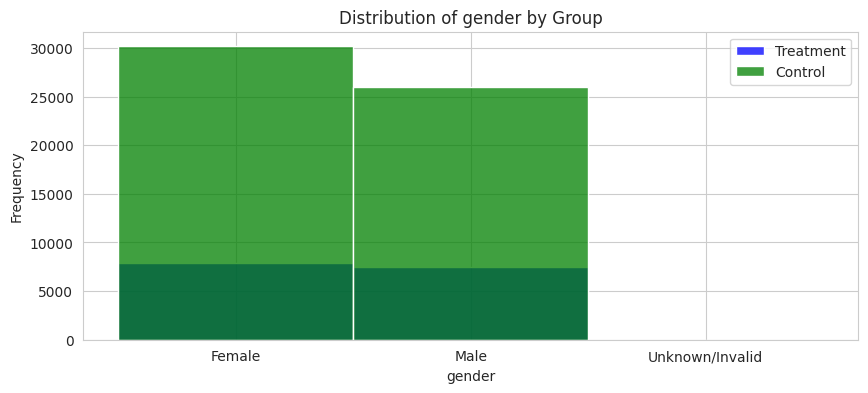

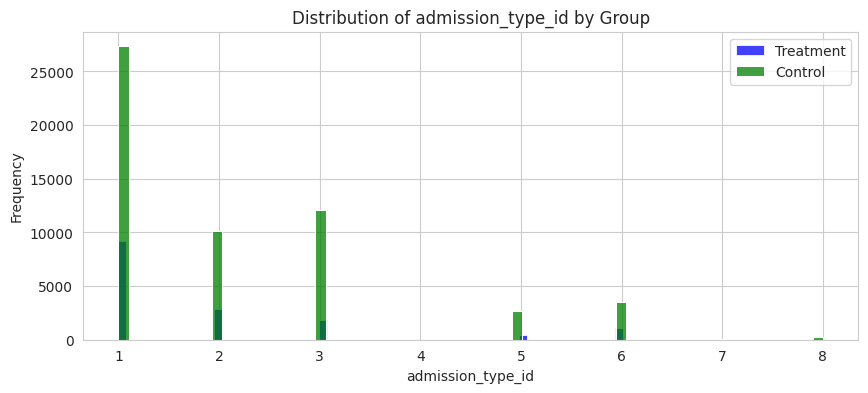

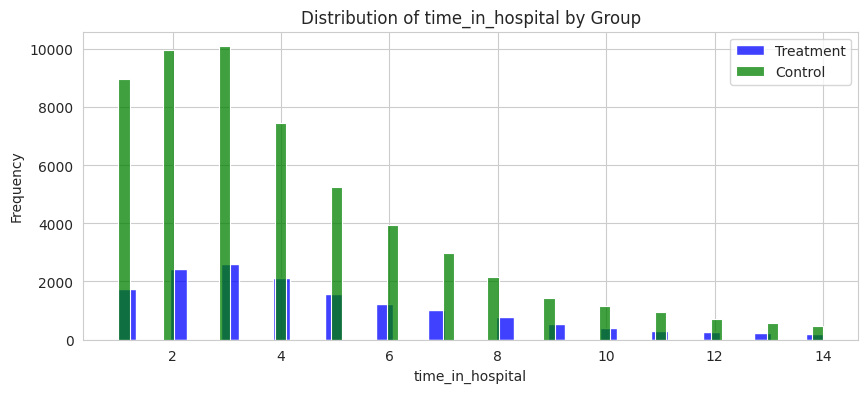

In [31]:
# There are covariates that are measured at baseline and there are other observations taken during the encounter - that is, during the hospitalization.
# First - histograms of covariates measured at baseline

covariates_baseline = ['race', 'gender', 'admission_type_id', 'time_in_hospital']
covariates_duringencounter = ['num_lab_procedures', 'change', 'diabetesMed', 'insulin', 'num_procedures', 'num_medications', 'num_emergencies', 'readmitted']

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

for covariate in covariates_baseline:
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(10,4))

    # Plot histograms for Treatment and Control groups
    sns.histplot(df[df['Group'] == 'Treatment'][covariate], ax=ax, label='Treatment', color='blue')
    sns.histplot(df[df['Group'] == 'Control'][covariate], ax=ax, label='Control', color='green')

    # Customize the plot
    # plt.xlabel(covariate, fontsize=10)  # Set xlabel to covariate with smaller font
    # ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.set_title(f'Distribution of {covariate} by Group')
    ax.set_xlabel(covariate)
    ax.set_ylabel('Frequency')
    ax.legend()

    plt.show()

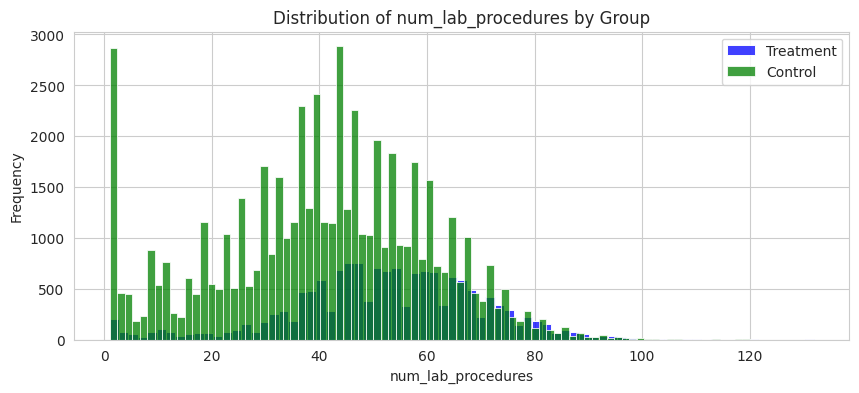

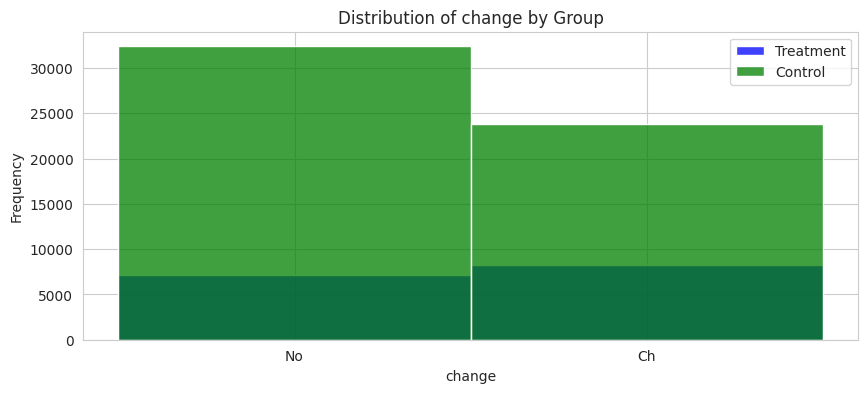

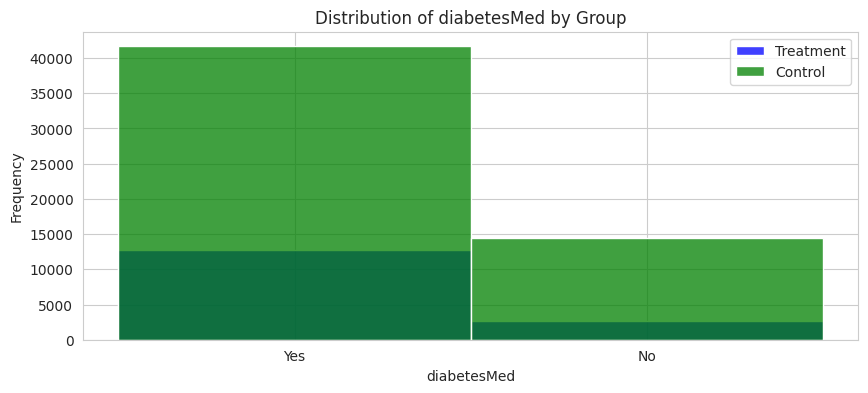

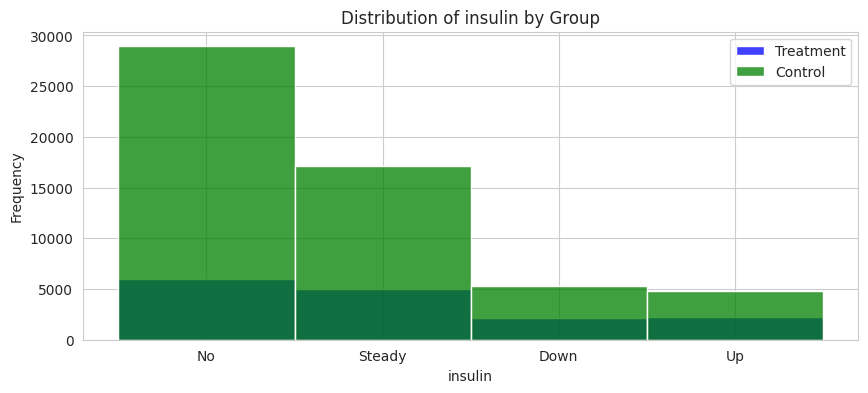

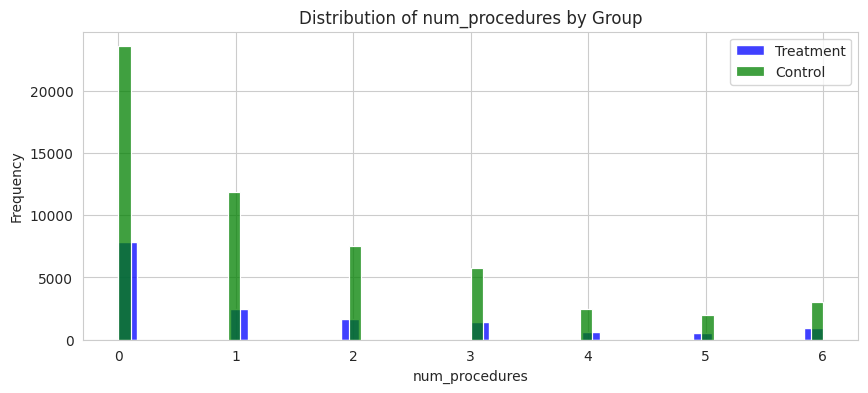

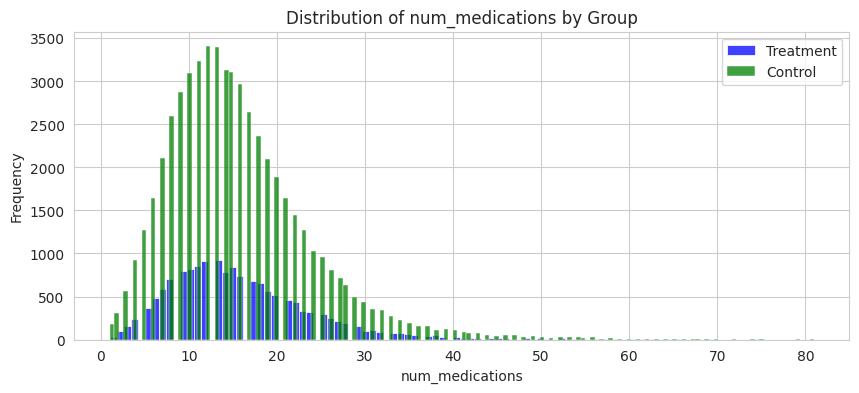

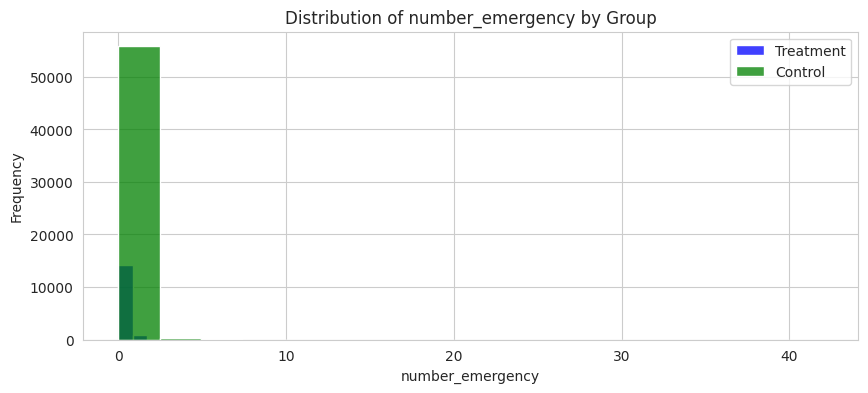

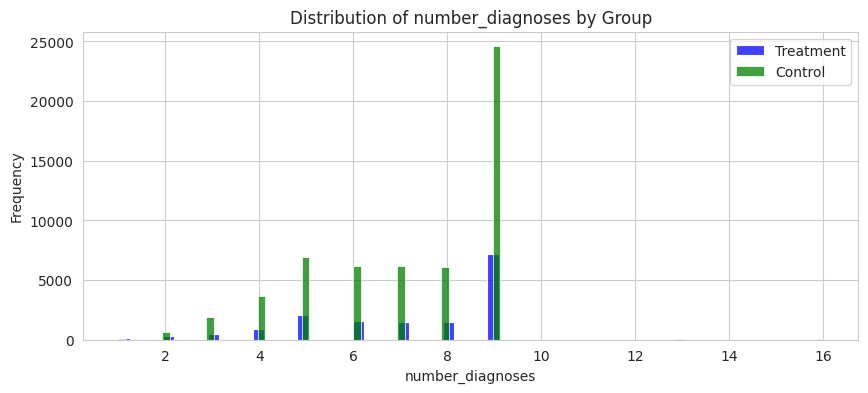

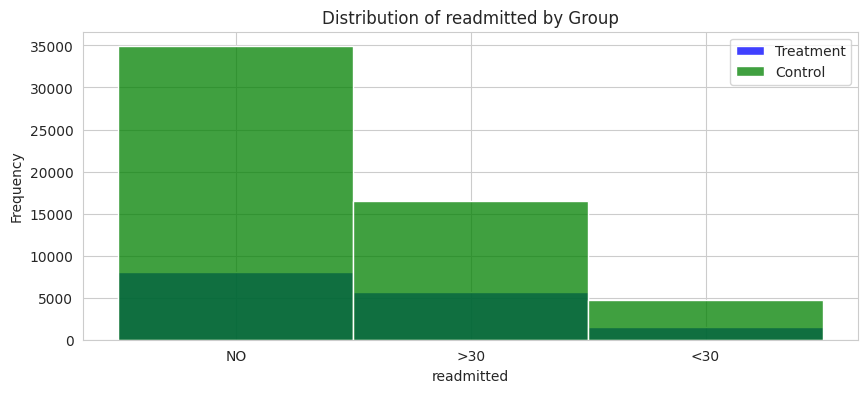

In [27]:
# There are covariates that are measured at baseline and there are other observations taken during the encounter - that is, during the hospitalization.
# Second - histograms of covariates measured during the hospitalization

# covariates_baseline = ['race', 'gender', 'admission_type_id', 'time_in_hospital']
covariates_duringencounter = ['num_lab_procedures', 'change', 'diabetesMed', 'insulin', 'num_procedures', 'num_medications', 'number_emergency', 'number_diagnoses', 'readmitted']

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

for covariate in covariates_duringencounter:
    # Create a figure and axes for the plot

    fig, ax = plt.subplots(figsize=(10,4))

    # Plot histograms for Treatment and Control groups
    sns.histplot(df[df['Group'] == 'Treatment'][covariate], ax=ax, label='Treatment', color='blue')
    sns.histplot(df[df['Group'] == 'Control'][covariate], ax=ax, label='Control', color='green')

    # Customize the plot
    ax.set_title(f'Distribution of {covariate} by Group')
    ax.set_xlabel(covariate)
    ax.set_ylabel('Frequency')
    ax.legend()

    # Display the plot
    plt.show()



---



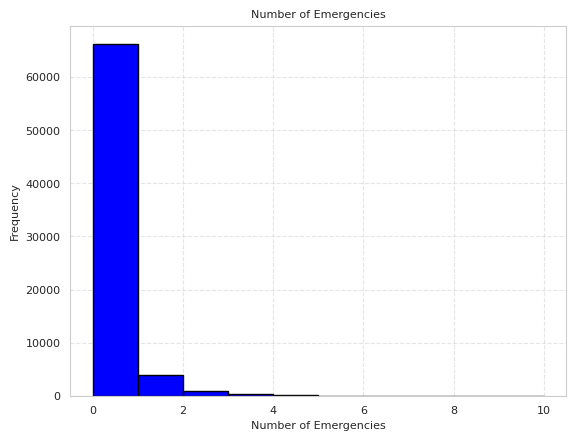

In [16]:
# Set Seaborn style
sns.set_style("whitegrid")  # You can explore other styles like 'darkgrid', 'white', 'ticks'

bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create the histogram
plt.hist(df['number_emergency'], bins=bin_edges, edgecolor='black', color='blue')

# Customize the plot
plt.title('Number of Emergencies', fontsize=8)  # Increase title font size
plt.xlabel('Number of Emergencies', fontsize=8)  # Increase x-axis label font size
plt.ylabel('Frequency', fontsize=8)  # Increase y-axis label font size
plt.xticks(fontsize=8)  # Increase x-axis tick label font size
plt.yticks(fontsize=8)  # Increase y-axis tick label font size

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.50)  # Customize grid style

# Display the plot
plt.show()

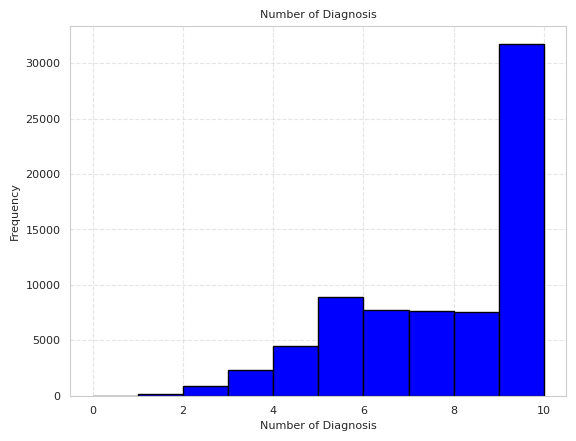

In [17]:
# Set Seaborn style
sns.set_style("whitegrid")  # You can explore other styles like 'darkgrid', 'white', 'ticks'

bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create the histogram
plt.hist(df['number_diagnoses'], bins=bin_edges, edgecolor='black', color='blue')

# Customize the plot
plt.title('Number of Diagnosis', fontsize=8)  # Increase title font size
plt.xlabel('Number of Diagnosis', fontsize=8)  # Increase x-axis label font size
plt.ylabel('Frequency', fontsize=8)  # Increase y-axis label font size
plt.xticks(fontsize=8)  # Increase x-axis tick label font size
plt.yticks(fontsize=8)  # Increase y-axis tick label font size

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.50)  # Customize grid style

# Display the plot
plt.show()

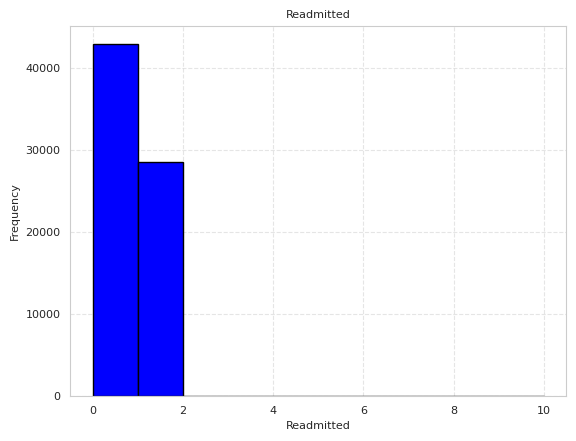

In [18]:
# Set Seaborn style
sns.set_style("whitegrid")  # You can explore other styles like 'darkgrid', 'white', 'ticks'

# Create the histogram

plt.hist(df['Readmission'], bins=bin_edges, edgecolor='black', color='blue')

# Customize the plot
plt.title('Readmitted', fontsize=8)  # Increase title font size
plt.xlabel('Readmitted', fontsize=8)  # Increase x-axis label font size
plt.ylabel('Frequency', fontsize=8)  # Increase y-axis label font size
plt.xticks(fontsize=8)  # Increase x-axis tick label font size
plt.yticks(fontsize=8)  # Increase y-axis tick label font size

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.50)  # Customize grid style

# Display the plot
plt.show()

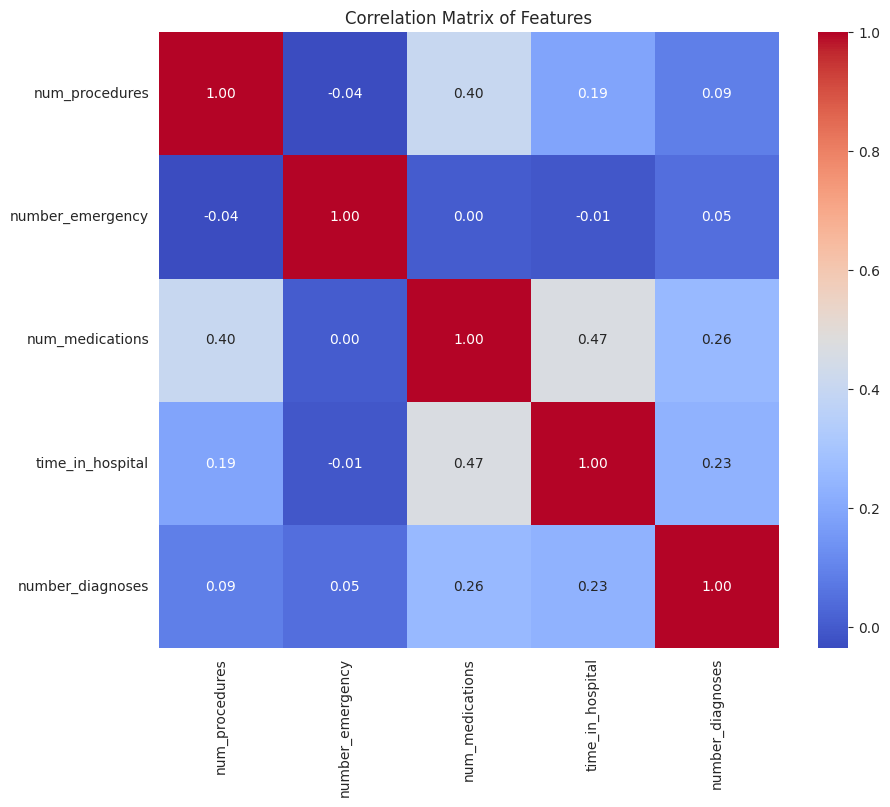

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' contains your features
# (after one-hot encoding, as in your previous code)
X = df[['num_procedures', 'number_emergency', 'num_medications', 'time_in_hospital', 'number_diagnoses']]  # Select relevant features

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()